# African Airlines Sentiment Analysis (2015-Present)
**Data Exploration**

### 1. Library Importation

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Loading the Data

In [7]:
#Dataframe with more preprocessing steps carried out on review texts
airlines_df = pd.read_csv('../data/interim/airlines_reduced.csv',index_col=0)

### 3. Data Exploration 

#### a. Number of reviews by airlines

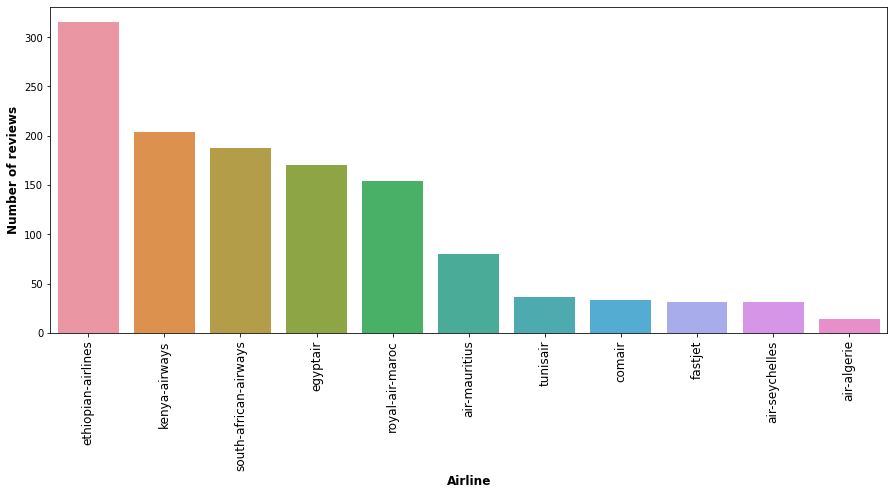

In [8]:
plt.figure(figsize = (15, 6))
sns.countplot(x = 'Subject', data = airlines_df,order= airlines_df.Subject.value_counts().index)
plt.ylabel('Number of reviews',fontsize=12, fontweight= 'bold')
plt.xlabel('Airline',fontsize=12, fontweight= 'bold')
plt.xticks(rotation = 90, fontsize=12)
plt.show()

#### b. Airlines ranked by average attribute rating

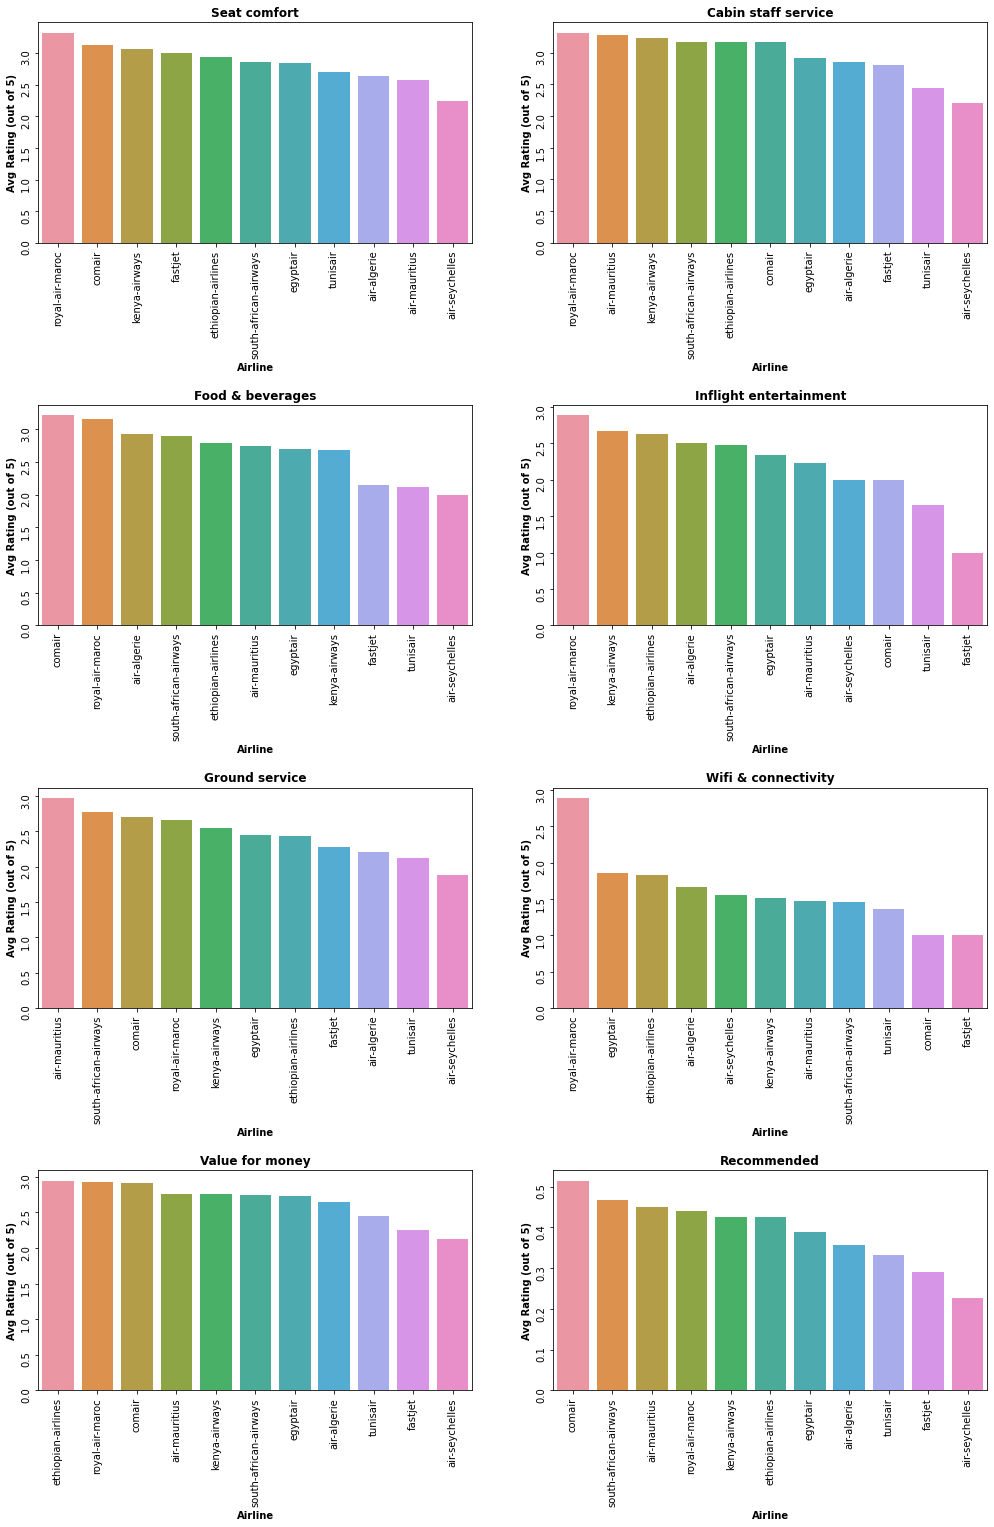

In [9]:
airline_avg_ratings = airlines_df.groupby('Subject')[airlines_df.columns[6:]].mean()

fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)
for i in range(0,8):
    ax_idx = [int(np.floor_divide(i,2)),int(np.mod(i,2))]
    var = airline_avg_ratings.columns[i]
    sns.barplot(ax = axes[tuple(ax_idx)],
                data = airline_avg_ratings.reset_index().sort_values(var, ascending=False),
                x ='Subject', 
                y = var)
    axes[tuple(ax_idx)].set_title(var.replace('_',' ').capitalize(), fontweight= 'bold')
    axes[tuple(ax_idx)].set_ylabel('Avg Rating (out of 5)', fontweight= 'semibold')
    axes[tuple(ax_idx)].set_xlabel('Airline', fontweight= 'semibold')
    axes[tuple(ax_idx)].tick_params(labelrotation=90)

plt.subplots_adjust(top = 2.9, bottom = 1)

- None of the average attribute ratings for any airline or attribute was >=4, which I interpret as being, at best fair/okay.
- The highest recommendation rate (corresponding to comair) was just above 0.5, suggesting at most a ~50% chance of a flyer recommending any of these airlines. Not ideal

#### c. Word Frequency

**Most frequent words for positive (proxy:recommended) reviews**

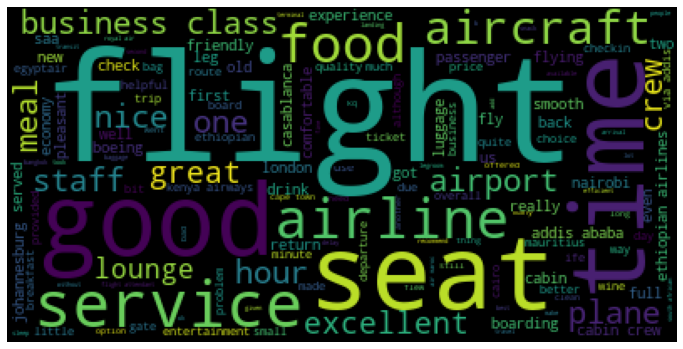

In [11]:
wordcloud = WordCloud().generate(airlines_df.query(f"recommended == 1")\
                                               .review_text.str.cat(sep=' '))
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the wordcloud above, the most meaningful words that stand out are mostly related to the in-flight attributes/characteristics e.g. food, service, seat, comfortable, staff, cabin crew, etc. 

Interesting to point out are the following: addis ababa (possibly related to Ethiopian Airlines), business class, and johannesburg (possibly related to South African Airlines) which might suggest high positivity with Ethiopian airlines, business class flights, and South African Airlines, respectively. This is explored later on.

**Most frequent words for negative (proxy: not recommended) reviews**

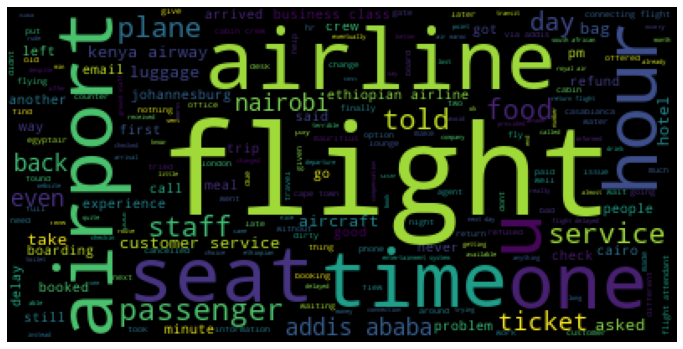

In [12]:
wordcloud = WordCloud().generate(airlines_df.query(f"recommended == 0")\
                                               .review_text.str.cat(sep=' '))
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the wordcloud above, a lot of the meaningful words that stand out are again mostly related to the in-flight attributes/characteristics e.g. food, service, seat, staff, plane, etc.

We also note words like customer service (hinting at bad customer service), ticket (hinting at problems with tickets), luggage (lost luggage?) and less prominent, delay(ed flights).

Interestingly, addis ababa (related to Ethiopian airlines) also shows up in the frequent negative words alongside kenya airway (well, this is wayyy more explicit )

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=efae64a4-05d7-49d5-9502-9df8903a8fa5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>